In [18]:
import pymssql
import pandas as pd

database = "group1"
table = "dbo.capstone_table"
username = "group1user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

conn = pymssql.connect(server,username, password,database)

cursor = conn.cursor()



In [19]:
query = 'select * from capstone_table'
df = pd.read_sql(query, conn)
df = df.dropna()

In [20]:

df[['Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Gini index (World Bank estimate)', 'Broad money (% of GDP)', 'Total reserves (includes gold, current US$)']] = df[['Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Gini index (World Bank estimate)', 'Broad money (% of GDP)', 'Total reserves (includes gold, current US$)']].apply(pd.to_numeric)
#df[['Stocks traded, total value (% of GDP)']] = df[['Stocks traded, total value (% of GDP)']].apply(pd.to_numeric)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 2 to 118
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   year                                                  59 non-null     object 
 1   country                                               59 non-null     object 
 2   Stocks traded, total value (% of GDP)                 59 non-null     float64
 3   Inflation, consumer prices (annual %)                 59 non-null     float64
 4   Stocks traded, turnover ratio of domestic shares (%)  59 non-null     float64
 5   Tax revenue (% of GDP)                                59 non-null     float64
 6   GDP per capita (current US$)                          59 non-null     float64
 7   Central government debt, total (% of GDP)             59 non-null     float64
 8   Gini index (World Bank estimate)                      59 non-

,year,country,"Stocks traded, total value (% of GDP)","Inflation, consumer prices (annual %)","Stocks traded, turnover ratio of domestic shares (%)",Tax revenue (% of GDP),GDP per capita (current US$),"Central government debt, total (% of GDP)",Gini index (World Bank estimate),Broad money (% of GDP),"Total reserves (includes gold, current US$)",timestamp
2,2011,US,264.084498,3.156842,262.427697,9.574004,49882.558132,90.054785,40.9,87.644758,5.372670e+11,1635359457790
3,2009,CH,138.054348,-0.480482,72.379913,9.281756,72083.167695,21.580617,32.9,138.152973,1.345657e+11,1635359759659
4,2012,US,199.724952,2.069337,173.285235,9.798256,51602.931046,94.163413,40.9,88.226044,5.742681e+11,1635359462803
5,2010,CH,145.064337,0.688239,71.205401,9.292883,77117.126014,20.858901,32.6,140.669830,2.704798e+11,1635359764679
6,2013,US,198.078952,1.464833,138.329337,10.519949,53106.536767,96.075603,40.7,88.968252,4.485089e+11,1635359467819


In [43]:
#next, I scale the data
#data_df = df[['Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Gini index (World Bank estimate)', 'Broad money (% of GDP)', 'Total reserves (includes gold, current US$)']].copy(deep=True)
data_df = df[['Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Gini index (World Bank estimate)', 'Total reserves (includes gold, current US$)']].copy(deep=True)

for col in data_df[['Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Gini index (World Bank estimate)', 'Total reserves (includes gold, current US$)']]:
    mean = data_df[col].mean()
    std = data_df[col].std()
    data_df[col] = (data_df[col] - mean)/std
    
data_df.head()   

#predict gini index based on everything else


,"Stocks traded, total value (% of GDP)","Inflation, consumer prices (annual %)","Stocks traded, turnover ratio of domestic shares (%)",Tax revenue (% of GDP),GDP per capita (current US$),"Central government debt, total (% of GDP)",Gini index (World Bank estimate),"Total reserves (includes gold, current US$)"
2,1.646987,0.815232,2.344139,-0.752628,0.180080,1.503712,1.166433,1.868130
3,0.028791,-1.684612,-0.459473,-0.793393,1.368788,-1.103657,-1.175364,-0.412246
4,0.820626,0.067817,1.029097,-0.721347,0.272196,1.660161,1.166433,2.077656
5,0.118797,-0.881379,-0.476799,-0.791840,1.638326,-1.131139,-1.263181,0.357395
6,0.799492,-0.347645,0.513423,-0.620680,0.352705,1.732974,1.107889,1.365520


In [44]:
#dependent:'Stocks traded, total value (% of GDP)', 'Inflation, consumer prices (annual %)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Tax revenue (% of GDP)', 'GDP per capita (current US$)', 'Central government debt, total (% of GDP)', 'Broad money (% of GDP)', 'Total reserves (includes gold, current US$)']]:
    
#independent: 'Gini index (World Bank estimate)'

from sklearn.model_selection import train_test_split
x = data_df.drop(columns=['Gini index (World Bank estimate)'])
x.head()

y = data_df['Gini index (World Bank estimate)'].copy(deep=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 66)


In [45]:
#lasso regression
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, max_iter=10000)
reg.fit(x_train,y_train)


LassoCV(cv=5, max_iter=10000, random_state=0)

In [46]:
y_predict = reg.predict(x_test)
#print(y_predict)
print(reg.coef_)
i=0
for i in range(0, len(reg.coef_)):
    print(f'{x_train.columns[i]}: {reg.coef_[i]}')
    
print(f'score: {reg.score(x_test, y_test)}')

#broad money: who is this???? - 

#broad money: sum of all money outside of banks

[ 0.32463957  0.04024658  0.         -0.34172838 -0.71776848  0.28365108
  0.20191744]
Stocks traded, total value (% of GDP): 0.3246395728635582
Inflation, consumer prices (annual %): 0.040246578293015166
Stocks traded, turnover ratio of domestic shares (%): 0.0
Tax revenue (% of GDP): -0.3417283796448708
GDP per capita (current US$): -0.7177684812990174
Central government debt, total (% of GDP): 0.2836510786122803
Total reserves (includes gold, current US$): 0.20191744145183374
score: 0.4817327093782978


<AxesSubplot:xlabel='lasso_prediction', ylabel='res'>

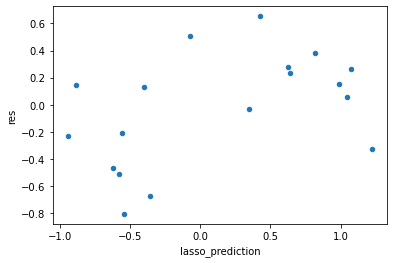

In [39]:
lasso_predict = pd.DataFrame(y_predict, columns=['lasso_prediction'])
y_test_frame = y_test.to_frame()
y_test_frame.head()
y_test_frame.reset_index(inplace=True)
y_test_frame.head()
y_test_frame.drop(columns=['index'], inplace=True)
lasso_scatter = pd.concat([lasso_predict, y_test_frame], axis=1)
lasso_scatter['res'] = lasso_scatter['Gini index (World Bank estimate)'] - lasso_scatter['lasso_prediction']
lasso_scatter.plot.scatter(x='lasso_prediction', y='res')


In [28]:
lasso_scatter.head(10)

,lasso_prediction,Gini index (World Bank estimate)
0,-0.576641,-1.087547
1,0.426216,1.078616
2,-0.546528,-1.350999
3,-0.072254,0.434622
4,1.047617,1.107889
5,0.641749,0.873709
6,-0.944866,-1.175364
7,-0.621619,-1.087547
8,1.074987,1.342068
9,0.623213,0.902981
